In [6]:
import numpy as np

# Считываем данные из файла
data = np.genfromtxt('lottery-draws.txt', delimiter=' ', skip_header=1, usecols=(1, 2, 3, 4, 5, 6))

# Функция для определения, выиграл ли кто-то джекпот (выбрал все 6 чисел)
def has_jackpot(row):
    return np.sum(row < 13) == 0

# Фильтруем только розыгрыши, которые не привели к увеличению джекпота
filtered_data = data[data[:, 0] == 0]

# Определяем, выиграл ли кто-то джекпот в каждом розыгрыше
jackpot_wins = np.array([has_jackpot(row) for row in filtered_data])

# Количество шаров с номерами меньше 13 в каждом розыгрыше
balls_less_than_13 = np.sum(filtered_data[:, 1:] < 13, axis=1)

# Вычисляем корреляцию между количеством таких шаров и выигрышами джекпота
correlation = np.corrcoef(balls_less_than_13, jackpot_wins)[0, 1]

print("Корреляция между количеством шаров с номерами меньше 13 и выигрышами джекпота:", correlation)

Корреляция между количеством шаров с номерами меньше 13 и выигрышами джекпота: nan


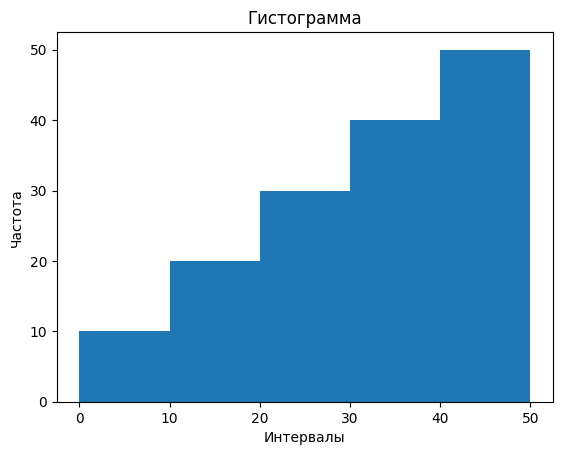

In [8]:
import matplotlib.pyplot as plt

# Ваши массивы hist и bins
hist = [10, 20, 30, 40, 50]  # Пример данных
bins = [0, 10, 20, 30, 40, 50]  # Пример интервалов

# Создаем графическое изображение гистограммы с помощью pyplot.bar
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')

# Настройка меток и заголовка
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.title('Гистограмма')

# Отображаем график
plt.show()


Средний рост мужчин (в сантиметрах): nan
Стандартное отклонение мужчин (в сантиметрах): nan
Средний рост женщин (в сантиметрах): nan
Стандартное отклонение женщин (в сантиметрах): nan


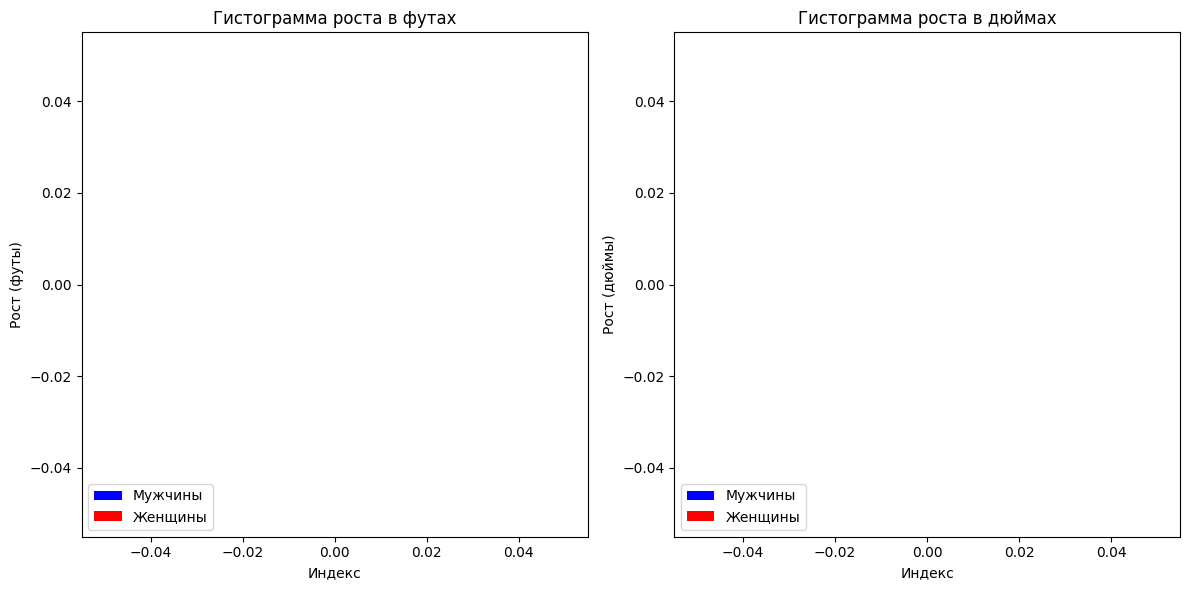

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Считываем данные из файлов
male_heights_cm = np.genfromtxt('ex6-3-f-male-heights.txt', delimiter=',')
female_heights_cm = np.genfromtxt('ex6-3-f-female-heights.txt', delimiter=',')

# Вычисляем среднее значение и стандартное отклонение в сантиметрах
mean_male_cm = np.mean(male_heights_cm)
std_male_cm = np.std(male_heights_cm)
mean_female_cm = np.mean(female_heights_cm)
std_female_cm = np.std(female_heights_cm)

# Выводим статистику для сантиметров
print("Средний рост мужчин (в сантиметрах):", mean_male_cm)
print("Стандартное отклонение мужчин (в сантиметрах):", std_male_cm)
print("Средний рост женщин (в сантиметрах):", mean_female_cm)
print("Стандартное отклонение женщин (в сантиметрах):", std_female_cm)

# Переводим рост из сантиметров в футы и дюймы
cm_to_inch = 0.393701
cm_to_ft = 0.0328084

male_heights_inch = male_heights_cm * cm_to_inch
female_heights_inch = female_heights_cm * cm_to_inch

male_heights_ft = male_heights_cm * cm_to_ft
female_heights_ft = female_heights_cm * cm_to_ft

# Создаем гистограммы для роста в футах и дюймах с явным указанием цветов
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(np.arange(len(male_heights_ft)), male_heights_ft, color='blue', label='Мужчины')
plt.bar(np.arange(len(female_heights_ft)), female_heights_ft, color='red', label='Женщины')
plt.xlabel('Индекс')
plt.ylabel('Рост (футы)')
plt.title('Гистограмма роста в футах')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(np.arange(len(male_heights_inch)), male_heights_inch, color='blue', label='Мужчины')
plt.bar(np.arange(len(female_heights_inch)), female_heights_inch, color='red', label='Женщины')
plt.xlabel('Индекс')
plt.ylabel('Рост (дюймы)')
plt.title('Гистограмма роста в дюймах')
plt.legend()

plt.tight_layout()
plt.show()
